<a href="https://colab.research.google.com/github/nupoor-ka/ES114-PSDV/blob/main/Image_Binarization_Otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMAGE BINARIZATION USING OTSU'S THRESHOLD

##IMPORTING RELEVANT LIBRARIES AND IMAGES

###IMPORTING LIBRARIES

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

###IMPORTING IMAGES

In [ ]:
img_1b = cv.imread('/content/drive/MyDrive/Classroom/otsu/dataset/bookpage_1.jpeg',0)
img_2b = cv.imread('/content/drive/MyDrive/Classroom/otsu/dataset/bookpage_2.jpeg',0)
img_panther = cv.imread('/content/drive/MyDrive/Classroom/otsu/dataset/panther.jpeg',0)
img_tom = cv.imread('/content/drive/MyDrive/Classroom/otsu/dataset/tom.jpeg',0)

##APPLYING OTSU'S METHOD OF BINARIZATION

###FUNCTION FOR CREATING HISTOGRAM

In [ ]:
def histo(image):
  x = np.arange(0,256)
  y = np.zeros((256,))
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      y[round(image[i][j])] += 1
  return x, y

###FUNCTION FOR FINDING OTSU'S THRESHOLD

In [ ]:
def calc_otsu_t(image):
  ints = np.arange(0,256)
  hist = np.zeros((256,))
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      hist[round(image[i][j])]+=1
  probs = hist/float(image.shape[0]*image.shape[1])
  t=0
  min_var = math.inf
  for i in range(1,256):
    w1 = np.sum(probs[0:i+1])
    w2 = 1 - w1
    m1 = 0
    m2 = 0
    for j in range(i+1):
      # m1 += ((j*probs[j])/w1)
      m1 += ((j*probs[j]))
    m1 = m1/w1
    for k in range(i+1, 256):
      m2 += ((k*probs[k])/w2)
    var1 = 0
    var2 = 0
    for j in range(i+1):
      var1 += ((((j-m1)**2)*probs[j])/w1)
    for k in range(i+1, 256):
      var2 += ((((k-m2)**2)*probs[k])/w2)
    in_class_var = (w1*var1) + (w2*var2)
    if in_class_var < min_var:
      min_var = in_class_var
      t = i
  return t

###FUNCTION FOR PERFORMING BINARIZATION

In [ ]:
def otsu(image, t):
  bin_img = np.empty(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] <= t:
        bin_img[i][j] = 0
      else:
        bin_img[i][j] = 255
  return bin_img

def display_binarized(image):
  t = calc_otsu_t(image)
  bin_img = otsu(image, t)
  figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(12, 8))
  axes[0][0].imshow(image, cmap = 'gray')
  axes[0][0].axis('off')
  axes[0][0].set_title('Original Image')
  axes[0][1].imshow(bin_img, cmap = 'gray')
  axes[0][1].axis('off')
  axes[0][1].set_title('Binarized Image')
  x1, y1 = histo(image)
  axes[1][0].plot(x1, y1)
  axes[1][0].set_title('Histogram of Original Image')
  x2, y2 = histo(bin_img)
  axes[1][1].plot(x2, y2)
  axes[1][1].set_title('Histogram of Binarized Image')
  plt.show()
  print("Otsu's Threshold =", t)

###APPLYING OTSU'S BINARIZATION

IMAGE 1

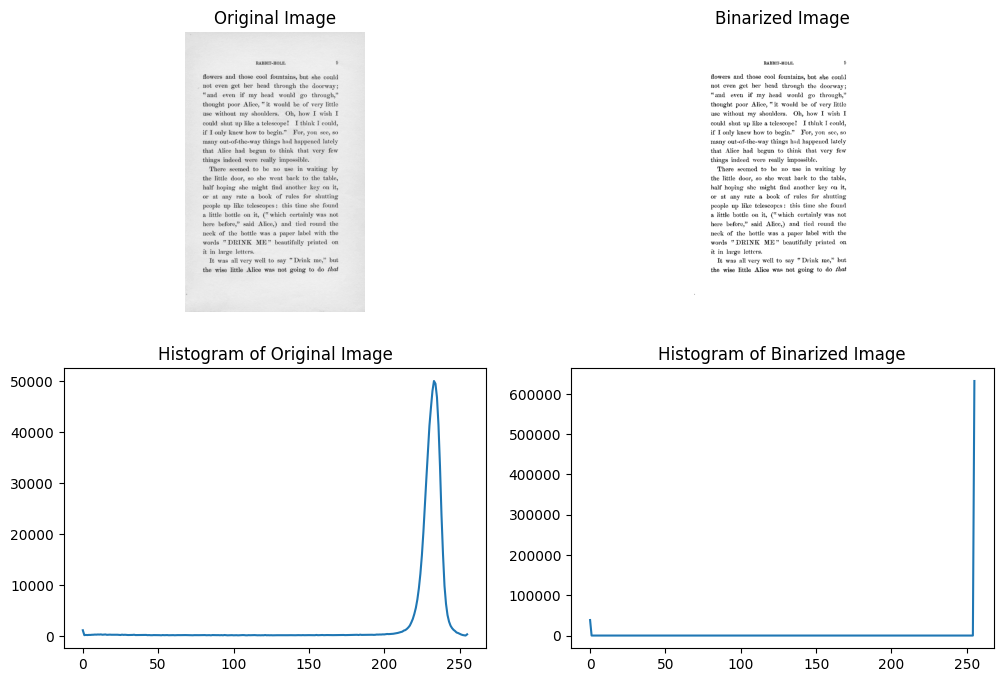

Otsu's Threshold = 149


In [ ]:
display_binarized(img_1b)

IMAGE 2

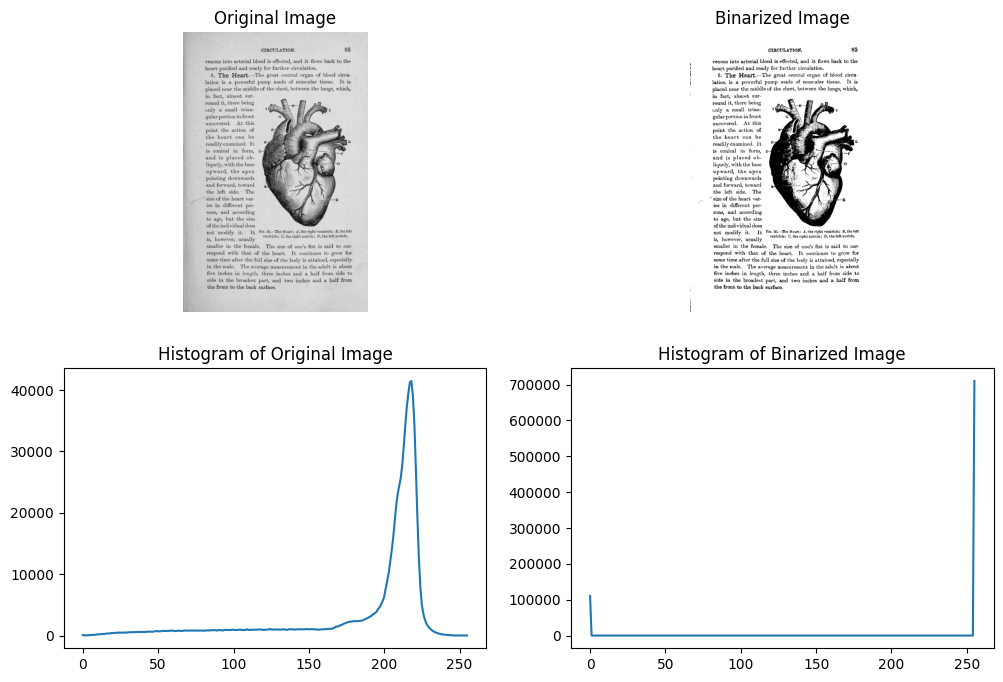

Otsu's Threshold = 149


In [ ]:
display_binarized(img_2b)

IMAGE 3

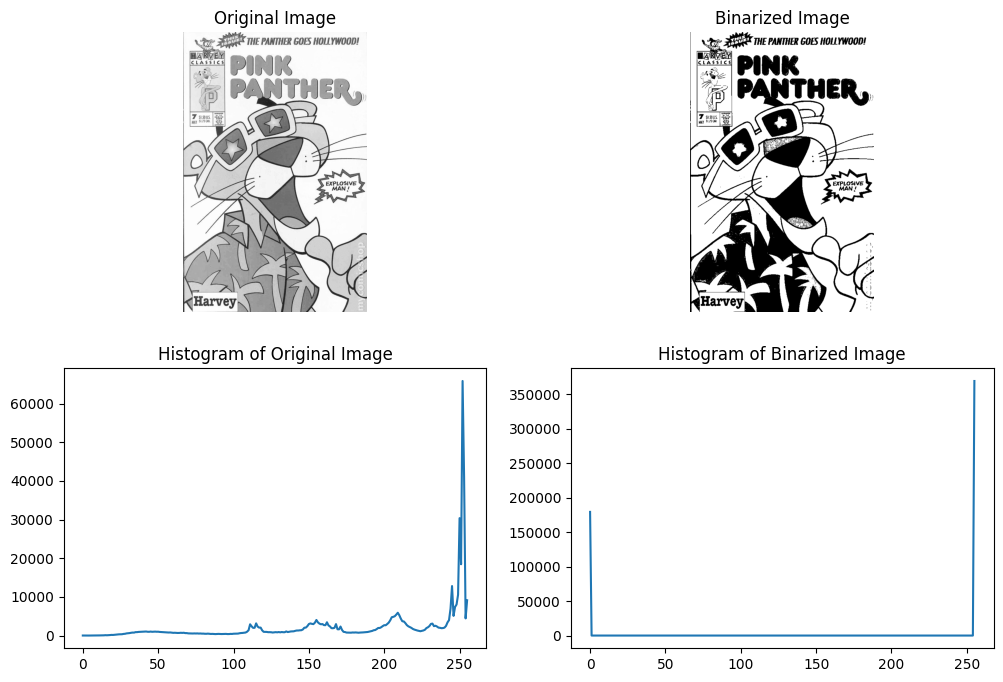

Otsu's Threshold = 177


In [ ]:
display_binarized(img_panther)

IMAGE 4

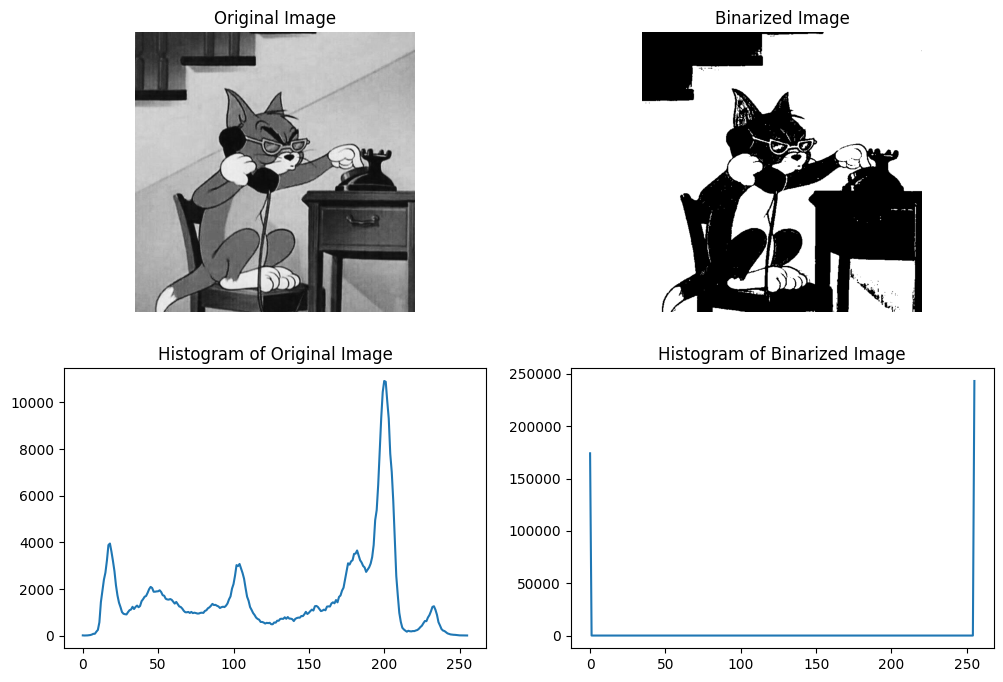

Otsu's Threshold = 125


In [ ]:
display_binarized(img_tom)

##APPLYING OTSU'S METHOD TO NOISY IMAGES

###FUNCTION TO ADD GAUSSIAN NOISE

In [ ]:
def add_noise(image, variance, mean):
  noise = np.random.normal(mean, math.pow(variance, 0.5), image.shape)
  noisy_image=np.empty(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      x = round(image[i][j]+noise[i][j])
      if x>=255:
        noisy_image[i][j]=255
      else:
        noisy_image[i][j]=x
  return noisy_image

###FUNCTION TO TEST IMAGES WITH ADDED NOISE

In [ ]:
def noised_binarization(image, var1, var2, var3):
  #print('1: Original Image')
  new_1 = add_noise(image, var1, 0)
  new_2 = add_noise(image, var2, 0)
  new_3 = add_noise(image, var3, 0)
  figure, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (25, 10))
  axes[0][0].imshow(image, cmap='gray')
  axes[0][0].axis('off')
  axes[0][0].set_title('Original Image')
  axes[0][1].imshow(new_1, cmap='gray')
  axes[0][1].axis('off')
  axes[0][1].set_title('Noisy Image, variance = '+str(var1))
  axes[0][2].imshow(new_2, cmap='gray')
  axes[0][2].axis('off')
  axes[0][2].set_title('Noisy Image, variance = '+str(var2))
  axes[0][3].imshow(new_3, cmap='gray')
  axes[0][3].axis('off')
  axes[0][3].set_title('Noisy Image, variance = '+str(var3))
  t = calc_otsu_t(image)
  bina = otsu(image,t)
  t1 = calc_otsu_t(new_1)
  bin1 = otsu(new_1,t1)
  t2 = calc_otsu_t(new_2)
  bin2 = otsu(new_2,t2)
  t3 = calc_otsu_t(new_3)
  bin3 = otsu(new_3,t3)
  axes[1][0].imshow(bina, cmap='gray')
  axes[1][0].axis('off')
  axes[1][0].set_title('Binarized Image')
  axes[1][1].imshow(bin1, cmap='gray')
  axes[1][1].axis('off')
  axes[1][1].set_title('Binarized Image')
  axes[1][2].imshow(bin2, cmap='gray')
  axes[1][2].axis('off')
  axes[1][2].set_title('Binarized Image')
  axes[1][3].imshow(bin3, cmap='gray')
  axes[1][3].axis('off')
  axes[1][3].set_title('Binarized Image')
  l1 = [image, new_1, new_2, new_3]
  l2 = [bina, bin1, bin2, bin3]
  for i in range(4):
    x, y = histo(l1[i])
    p, q = histo(l2[i])
    axes[2][i].plot(x, y, color = 'blue')
    axes[2][i].plot(p, q, color = 'red')

###TESTING IMAGES WITH ADDED NOISE

IMAGE 1

Enter three different values of variance for Gaussian noise
Variance for first image: 400
Variance for second image: 900
Variance for third image: 1600


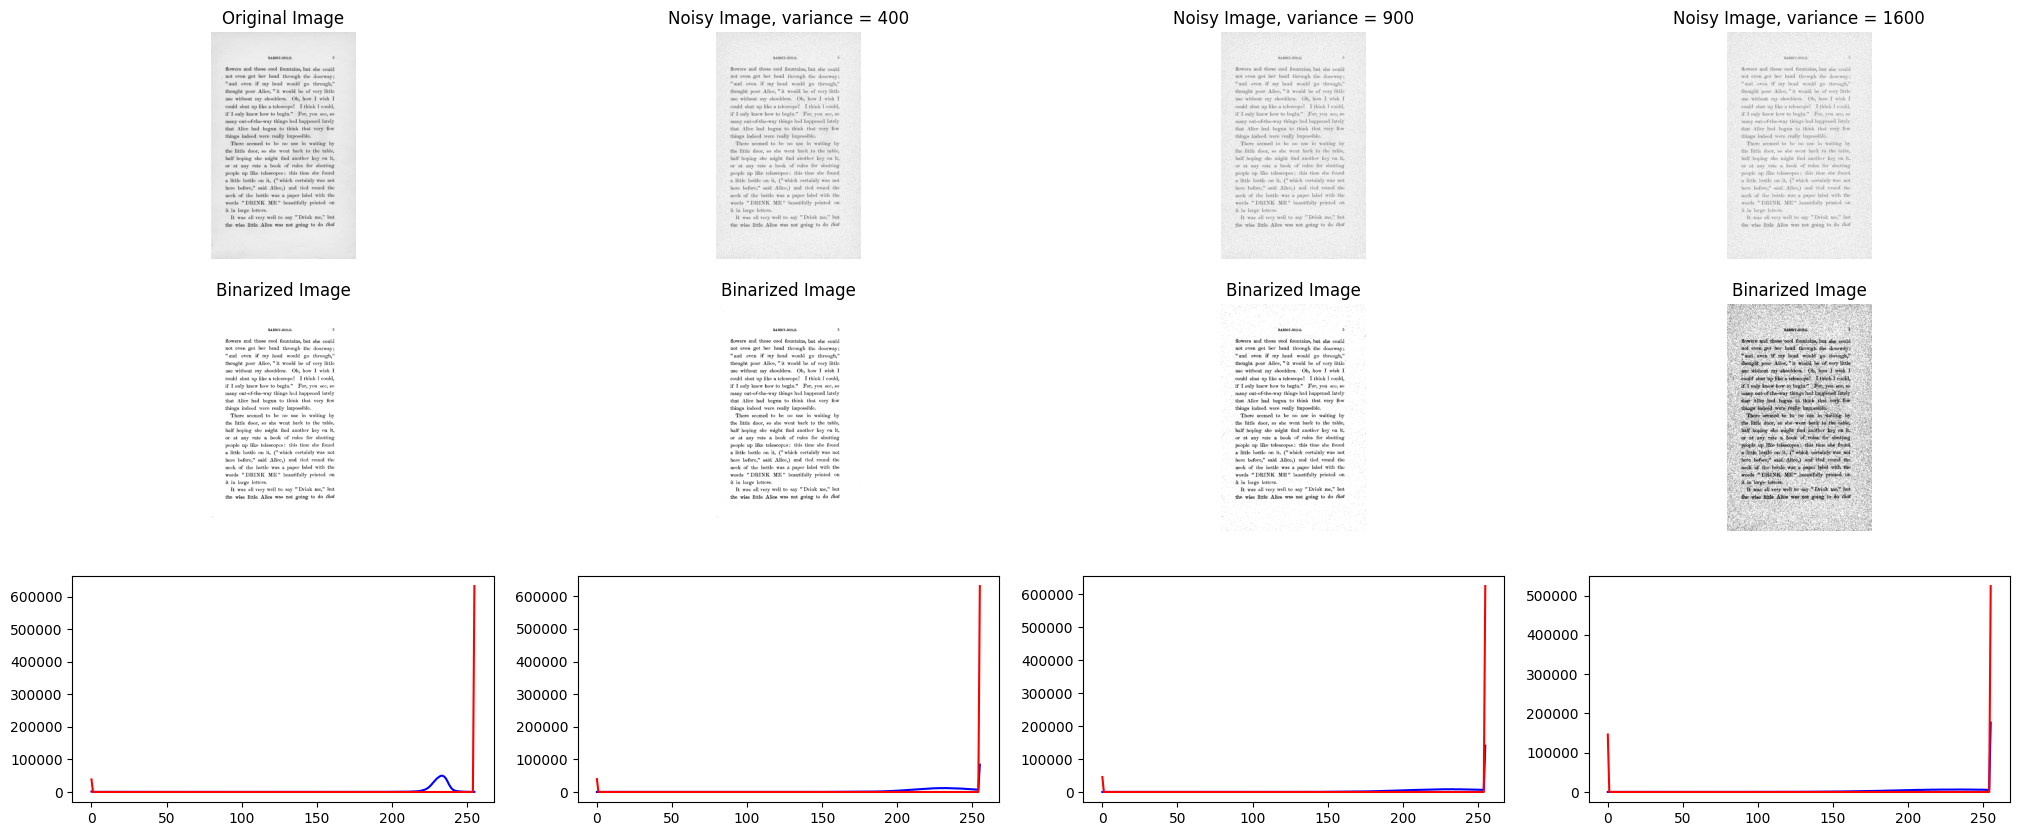

In [ ]:
print('Enter three different values of variance for Gaussian noise')
var1 = int(input('Variance for first image: '))
var2 = int(input('Variance for second image: '))
var3 = int(input('Variance for third image: '))
noised_binarization(img_1b, var1, var2, var3)

IMAGE 2

Enter three different values of variance for Gaussian noise
Variance for first image: 400
Variance for second image: 900
Variance for third image: 1600


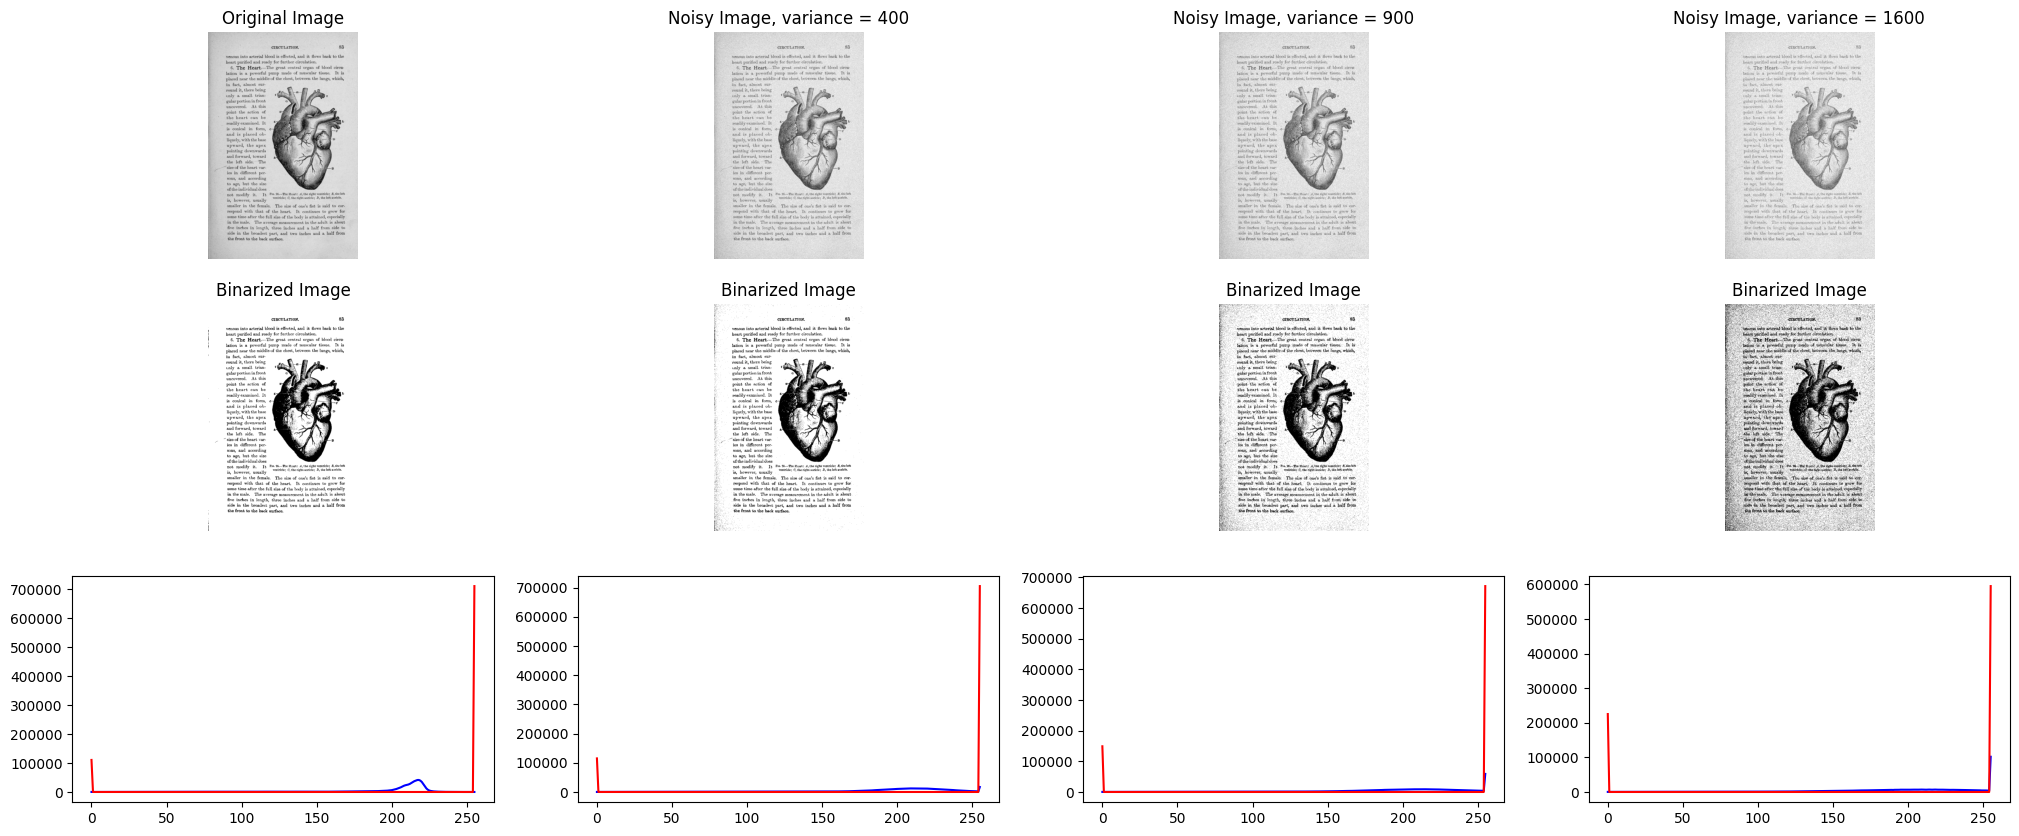

In [ ]:
print('Enter three different values of variance for Gaussian noise')
var1 = int(input('Variance for first image: '))
var2 = int(input('Variance for second image: '))
var3 = int(input('Variance for third image: '))
noised_binarization(img_2b, var1, var2, var3)

IMAGE 3

Enter three different values of variance for Gaussian noise
Variance for first image: 400
Variance for second image: 900
Variance for third image: 1600


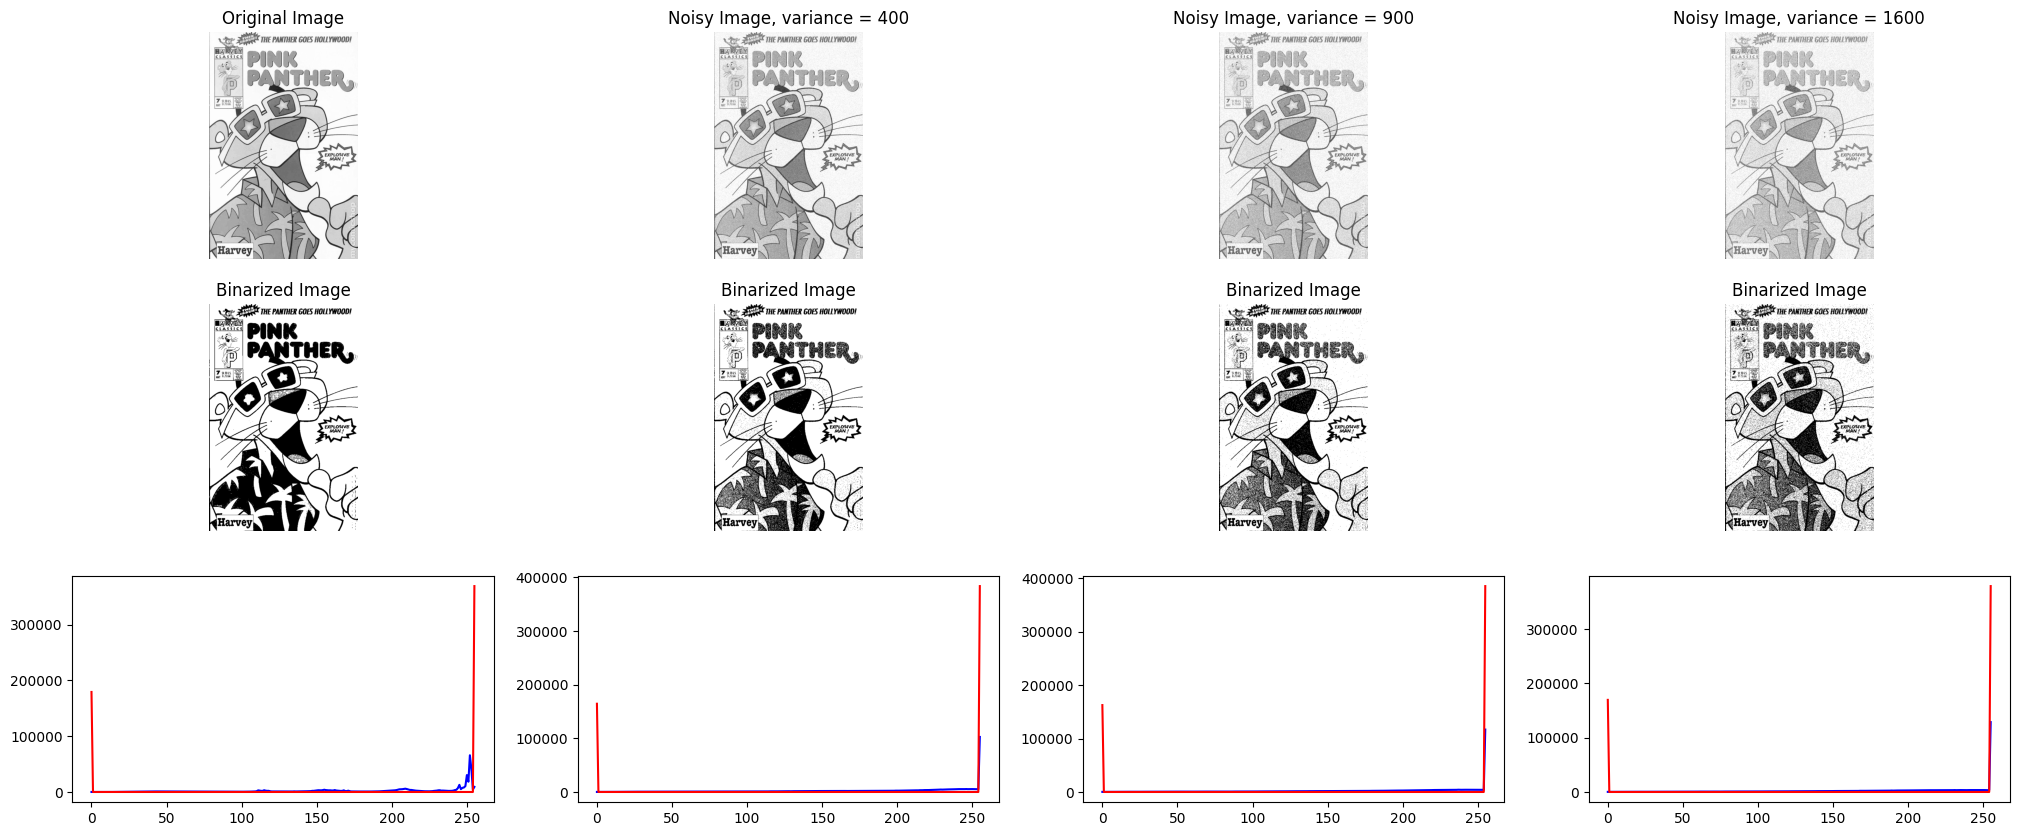

In [ ]:
print('Enter three different values of variance for Gaussian noise')
var1 = int(input('Variance for first image: '))
var2 = int(input('Variance for second image: '))
var3 = int(input('Variance for third image: '))
noised_binarization(img_panther, var1, var2, var3)

IMAGE 4

Enter three different values of variance for Gaussian noise
Variance for first image: 400
Variance for second image: 900
Variance for third image: 1600


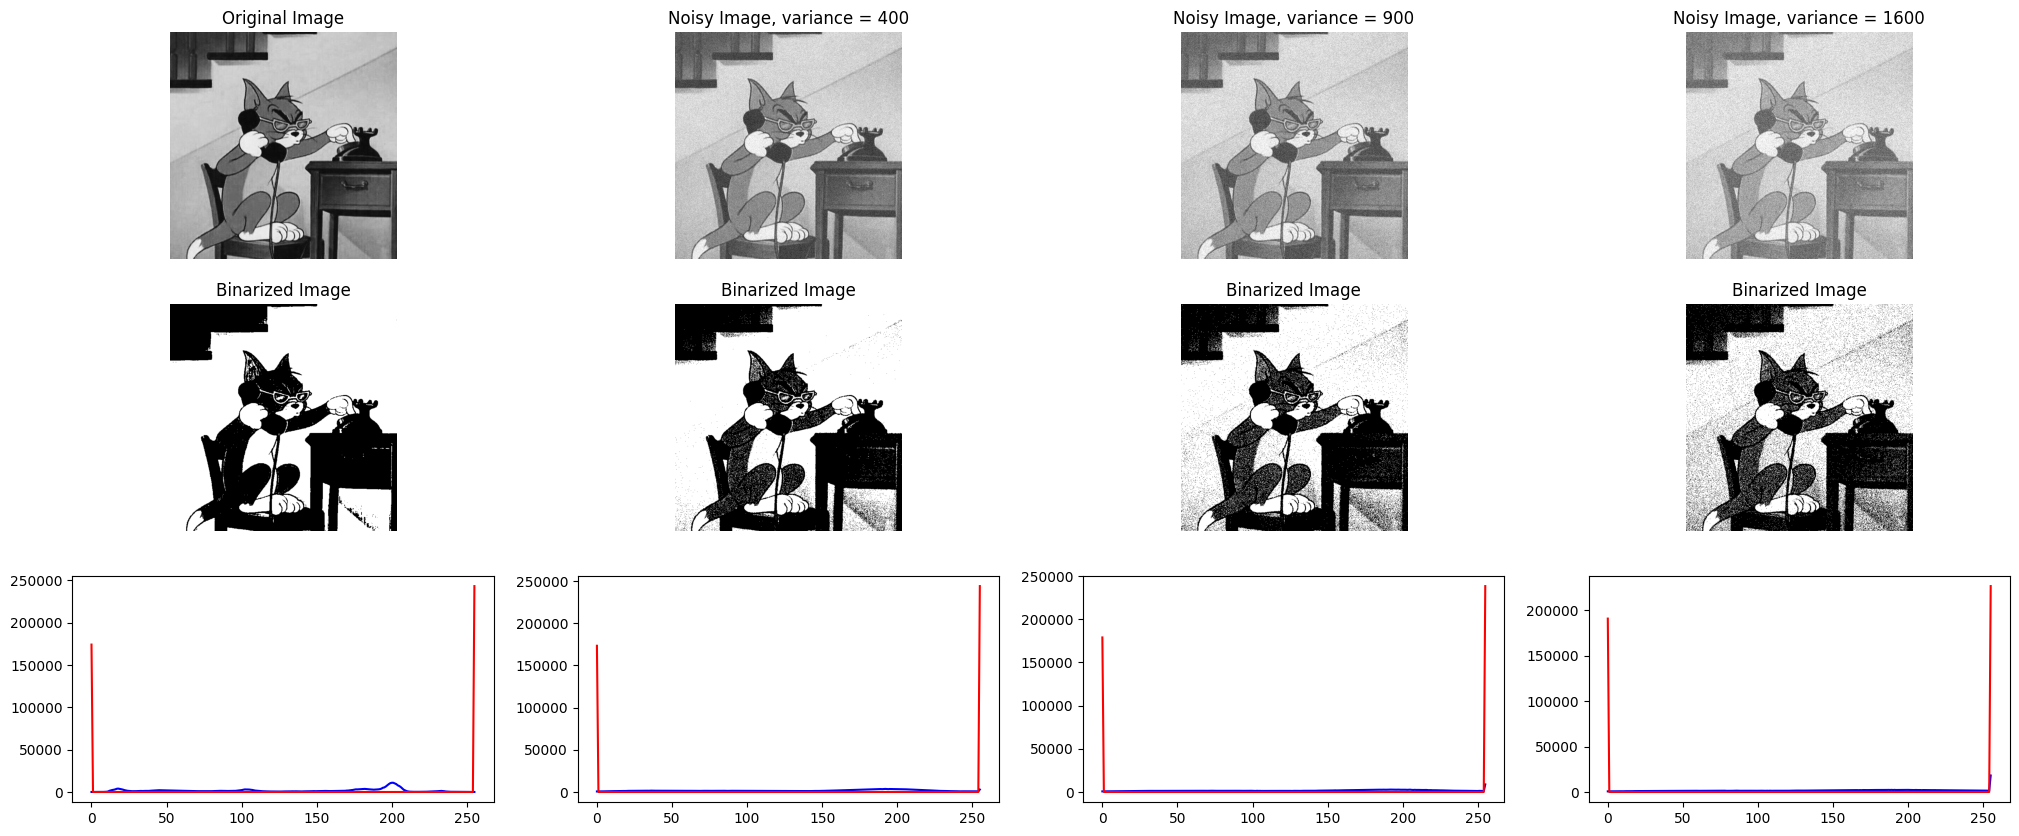

In [ ]:
print('Enter three different values of variance for Gaussian noise')
var1 = int(input('Variance for first image: '))
var2 = int(input('Variance for second image: '))
var3 = int(input('Variance for third image: '))
noised_binarization(img_tom, var1, var2, var3)

#REPORT

##THEORY

Binarization of an image is the process of converting it into an image with pixels having only two intensity levels, usually the least possible and the maximum possible.

Binarization is useful in separating the object from the background in an image and compressing the image and reducing its file size.

For binarization, we need to perform some type of image segmentation. The simplest of these types is thresholding. Binarization after thresholding involves setting an intensity threshold, all pixels with intensity lower than the threshold are assigned the least intensity, and the rest are assigned maximum intensity.

The way that this threshold has been chosen in this case is Otsu's method. In this method the threshold is determined by minimizing intra-class intensity variance, $\sigma^{2}_b$, or equivalently, by maximizing inter-class variance, $\sigma^{2}_w$.

$\sigma^{2}_w(t) = w_1(t)w_2(t)[\mu_1(t)-\mu_2(t)]^{2}$

$\sigma^{2}_b(t) = w_1(t)\sigma^{2}_1(t) + w_2(t)\sigma^{2}_2(t)$

Here:

$n$, the total number of pixels

$I = 255$, the maximum pixel intensity

$t$, threshold value

$P(i) = \frac{n_i}{n}$, probability of a particular pixel value i

$w_1(t) = \sum_{i=1}^{t}P(i)$, weight of the frist class

$w_2(t) = \sum_{i=t+1}^{I}P(i)$, weight of the second class

$\mu_1(t) = \sum_{i=1}^{t}\frac{iP(i)}{w_1(t)}$, mean of the first class

$\mu_2(t) = \sum_{i=t+1}^{I}\frac{iP(i)}{w_2(t)}$, mean of the second class

$\sigma_1^{2}(t) = \sum_{i=1}^{t}[i - \mu_1(t)]^2 \frac{P(i)}{w_1(t)}$, variance of the first class

$\sigma_2^{2}(t) = \sum_{i=t+1}^{I}[i - \mu_2(t)]^2 \frac{P(i)}{w_2(t)}$, variance of the second class

Four images have been binarized here to showcase Otsu's method. Then Gaussian noise with different variances have been added to the images and they've been binarized again. It can be observed that noisy object and background cannot be separated easily via binarization if the image is very noisy.

The code minimizes the intra-class variance using these formulae. It also shows the histograms of the source and binarized images.

##SOURCES

[1] “Numpy.random.normal — NumPy V1.21 Manual.” *Numpy.org*, https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html (accessed Mar. 08, 2024).

[1]A. Murzova and S. Seth, “Otsu’s Thresholding Technique | Learn OpenCV,” *learnopencv.com*, Aug. 05, 2020. https://learnopencv.com/otsu-thresholding-with-opencv/ (accessed Mar. 08, 2024).

[3] Wikipedia Contributors, “Otsu’s method,” *Wikipedia*, Nov. 20, 2023. https://en.wikipedia.org/wiki/Otsu%27s_method?authuser=0 (accessed Mar. 08, 2024).

[4] Contributors and developers of NumPy, “numpy.random.normal — NumPy v1.21 Manual,” *numpy.org*. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html (accessed Mar. 08, 2024).

[5] “OpenCV: Image Thresholding,” *docs.opencv.org.* https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

##PEERS DISCUSSED WITH

Ginisha Garg 23110117

Pranav Thakkar 23110253

Hasan Ali 23110133